<a href="https://colab.research.google.com/github/Nyawira12/Regression-Analysis/blob/master/Mchezopesa_Analysis_Week_6_IP_Lilian_Nyawira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Question


> You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked with the following.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).



### b) Defining the Metric for Success
1. Idenitifying the appropriate variables.
2. Accurately predict (greater than or equal to 70%) the home team and away team scores.
3. Successfully fitting and evaluating the models. 

### c) Understanding the context 

Mchezopesa is a sports analytics company that specialises in analysing team and individual performances in the football sector. Resulting metrics are used in making predictions which makes the platform popular especially among fantasy leagues. 

### d) Recording the Experimental Design

- Loading libraries and importing the datasets. 
- Exploring and cleaning datasets. 
- Exploratory data analysis. 
- Feature engineering. 
- Obtaining appropriate training and test sets. 
- Fitting and evaluating the models 

### e) Data Relevance

The data used in the analysis is relevant as both results and ranking datasets will be utilised. 

## 2. Loading Libraries & Importing Datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Loading the Dataset

Ranking = pd.read_csv('/content/fifa_ranking.csv')
Ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [3]:
Results = pd.read_csv('/content/results.csv')
Results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


## 3. Checking and Cleaning Datasets

In [4]:
Ranking.nunique()


rank                         209
country_full                 216
country_abrv                 216
total_points               11114
previous_points             1557
rank_change                  121
cur_year_avg                7419
cur_year_avg_weighted       7419
last_year_avg               7473
last_year_avg_weighted      7001
two_year_ago_avg            7575
two_year_ago_weighted       6513
three_year_ago_avg          7628
three_year_ago_weighted     5849
confederation                  6
rank_date                    286
dtype: int64

In [5]:
Results.nunique()

date          15115
home_team       309
away_team       306
home_score       26
away_score       22
tournament      109
city           1960
country         266
neutral           2
dtype: int64

In [6]:
Ranking.isnull().any()

rank                       False
country_full               False
country_abrv               False
total_points               False
previous_points            False
rank_change                False
cur_year_avg               False
cur_year_avg_weighted      False
last_year_avg              False
last_year_avg_weighted     False
two_year_ago_avg           False
two_year_ago_weighted      False
three_year_ago_avg         False
three_year_ago_weighted    False
confederation              False
rank_date                  False
dtype: bool

In [7]:
Results.isnull().any()

date          False
home_team     False
away_team     False
home_score    False
away_score    False
tournament    False
city          False
country       False
neutral       False
dtype: bool

In [8]:
Ranking.duplicated().any()

True

In [9]:
Results.duplicated().any()

False

In [10]:
Ranking.drop_duplicates(keep='first', inplace=True)

In [11]:
Ranking.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [12]:
Results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [13]:
Ranking.shape

(57756, 16)

In [14]:
Results.shape

(40839, 9)

In [15]:
Ranking.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [16]:
Results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

## 4. External Data Source Validation

The dataset was validated aganist external source and found to be of good quality. 

A more detailed explanation and history of the rankings is available here: https://en.wikipedia.org/wiki/FIFA_World_Rankings

An explanation of the ranking procedure is available here:  https://www.fifa.com/fifa-world-ranking/procedure/men.html

## 5. Tidying the Dataset

In [17]:
Ranking = Ranking.rename(columns = {"rank_date" : "date"})


In [18]:
Results.date = Results.date.apply(lambda x: x.replace('/', '-'))
Ranking.date = Ranking.date.apply(lambda x: x.replace('/', '-'))

In [19]:
Ranking.date = pd.to_datetime(Ranking.date)
Results.date = pd.to_datetime(Results.date)

In [20]:
Ranking['year'] = Ranking.date.dt.year
Results['year'] = Results.date.dt.year

Ranking['month'] = Ranking.date.dt.month
Results['month'] = Results.date.dt.month

In [21]:
Football = pd.merge(Results, Ranking, how = 'left', left_on = ['year', 'month'], right_on = ['year', 'month'])

In [22]:
Football.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date_y
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [23]:
Home_info = Football[Football.home_team == Football.country_full]
Home_info.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date_y
17928,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19.0,Colombia,COL,0.0,36.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
18146,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,70.0,Peru,PER,0.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
18265,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Montevideo,Uruguay,False,1993,8,22.0,Uruguay,URU,0.0,47.0,-6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
18504,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,San Cristóbal,Venezuela,False,1993,8,94.0,Venezuela,VEN,0.0,4.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
18635,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Abidjan,Ivory Coast,True,1993,8,58.0,Senegal,SEN,0.0,27.0,-7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08


In [24]:
Home_info = Home_info.rename(columns = ({'rank' : 'home_team_rank', 'rank_change' : 'home_rank_change'}))

In [25]:
Home_info.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,home_team_rank,country_full,country_abrv,total_points,previous_points,home_rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date_y
17928,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19.0,Colombia,COL,0.0,36.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
18146,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,70.0,Peru,PER,0.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
18265,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Montevideo,Uruguay,False,1993,8,22.0,Uruguay,URU,0.0,47.0,-6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
18504,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,San Cristóbal,Venezuela,False,1993,8,94.0,Venezuela,VEN,0.0,4.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
18635,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Abidjan,Ivory Coast,True,1993,8,58.0,Senegal,SEN,0.0,27.0,-7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08


In [26]:
Away_info = Football[Football.away_team == Football.country_full]
Away_info.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date_y
17976,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,67.0,Paraguay,PAR,0.0,22.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
18081,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,5.0,Argentina,ARG,0.0,51.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
18278,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Montevideo,Uruguay,False,1993,8,35.0,Ecuador,ECU,0.0,23.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
18418,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,San Cristóbal,Venezuela,False,1993,8,8.0,Brazil,BRA,0.0,55.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
18602,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Abidjan,Ivory Coast,True,1993,8,25.0,Zambia,ZAM,0.0,38.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08


In [27]:
Away_info = Away_info.rename(columns = ({'rank' : 'away_team_rank', 'rank_change' : 'away_rank_change'}))

In [28]:
Away_info.drop(['date_x','home_score','away_score','tournament','city','country','neutral','date_y','confederation'], axis = 1, inplace = True)

In [29]:
Away_info.head()

,home_team,away_team,year,month,away_team_rank,country_full,country_abrv,total_points,previous_points,away_rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
17976,Colombia,Paraguay,1993,8,67.0,Paraguay,PAR,0.0,22.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18081,Peru,Argentina,1993,8,5.0,Argentina,ARG,0.0,51.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18278,Uruguay,Ecuador,1993,8,35.0,Ecuador,ECU,0.0,23.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18418,Venezuela,Brazil,1993,8,8.0,Brazil,BRA,0.0,55.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18602,Senegal,Zambia,1993,8,25.0,Zambia,ZAM,0.0,38.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
Football_df = pd.merge(Home_info, Away_info, how='left' , left_on=['year' , 'month' , 'home_team' ,	'away_team', 'country_full'],\
                       right_on=['year' , 'month' , 'home_team' ,	'away_team', 'country_full'])

In [31]:
Football_df.isnull().sum()

date_x                           0
home_team                        0
away_team                        0
home_score                       0
away_score                       0
tournament                       0
city                             0
country                          0
neutral                          0
year                             0
month                            0
home_team_rank                   0
country_full                     0
country_abrv_x                   0
total_points_x                   0
previous_points_x                0
home_rank_change                 0
cur_year_avg_x                   0
cur_year_avg_weighted_x          0
last_year_avg_x                  0
last_year_avg_weighted_x         0
two_year_ago_avg_x               0
two_year_ago_weighted_x          0
three_year_ago_avg_x             0
three_year_ago_weighted_x        0
confederation                    0
date_y                           0
away_team_rank               18593
country_abrv_y      

In [32]:
Data = ['home_team', 'away_team', 'tournament', 'city', 'country', 'neutral', 'year', 'month']

Football_df[Data] = Football_df[Data].astype('category')

In [33]:
Football_df['score'] = Football_df.home_score - Football_df.away_score

In [34]:
Football_df.drop(columns = ['city',	'country',	'neutral',	'year',	'month',	'home_team_rank',	'country_full',	'country_abrv_x',	
                            'total_points_x',	'previous_points_x',	'home_rank_change',	'cur_year_avg_x',	'cur_year_avg_weighted_x',	
                            'last_year_avg_x',	'last_year_avg_weighted_x', 'two_year_ago_avg_x',	'two_year_ago_weighted_x',	
                            'three_year_ago_avg_x',	'three_year_ago_weighted_x',	'confederation',	'date_y', 'away_team_rank',	
                            'country_abrv_y',	'total_points_y',	'previous_points_y',	'away_rank_change',	'cur_year_avg_y',	
                            'cur_year_avg_weighted_y',	'last_year_avg_y',	'last_year_avg_weighted_y',	'two_year_ago_avg_y',	
                            'two_year_ago_weighted_y',	'three_year_ago_avg_y',	'three_year_ago_weighted_y'], axis = 1, inplace = True)

In [35]:
Football_df['home_team_rank'] = Home_info['home_team_rank']
Football_df['away_team_rank'] = Away_info['away_team_rank']
Football_df['home_team_rank_change'] = Home_info['home_rank_change']
Football_df['away_team_rank_change'] = Away_info['away_rank_change']

In [36]:
def result(goals):
  if goals > 0:
    return 'Win'
  elif goals < 0:
    return 'Lose'
  else:
    return 'Draw'
# Applying the result function to the complete_merged_df

Football_df['result'] = Football_df.score.apply(lambda x: result(x))

# Dropping the score column

Football_df.drop('score', axis = 1, inplace = True)

# Creating a column of total goals scored

Football_df['total_goals'] = Football_df.home_score + Football_df.away_score

# Previewing the complete_merged_df together with the result column

Football_df.head()

,date_x,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,home_team_rank_change,away_team_rank_change,result,total_goals
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,NaN,NaN,NaN,NaN,Draw,0
1,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,NaN,NaN,NaN,NaN,Lose,1
2,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,NaN,NaN,NaN,NaN,Draw,0
3,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,NaN,NaN,NaN,NaN,Lose,6
4,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,NaN,NaN,NaN,NaN,Draw,0


## 6. Exploratory Analysis

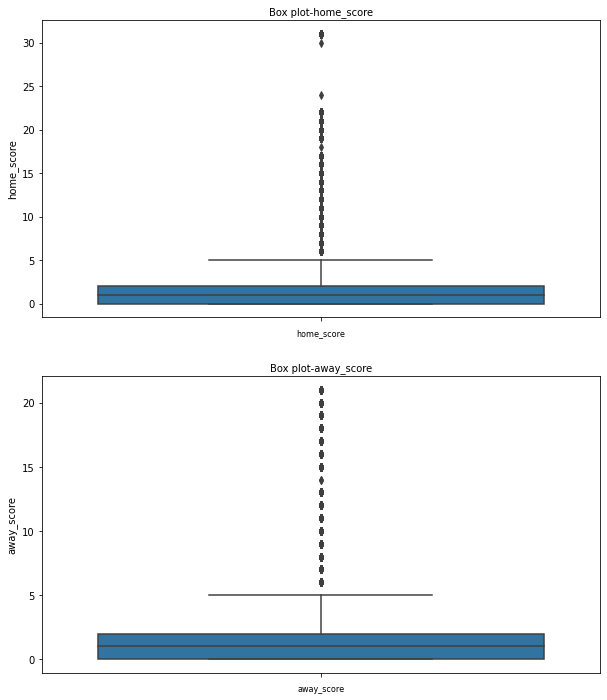

In [37]:
#checking for outliers

cols = ['home_score', 'away_score']


fig, ax = plt.subplots(len(cols), figsize = (10, 12))

for i, col_val in enumerate(cols):

  sns.boxplot(y= Football[col_val], ax=ax[i])
  ax[i].set_title('Box plot-{}'.format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

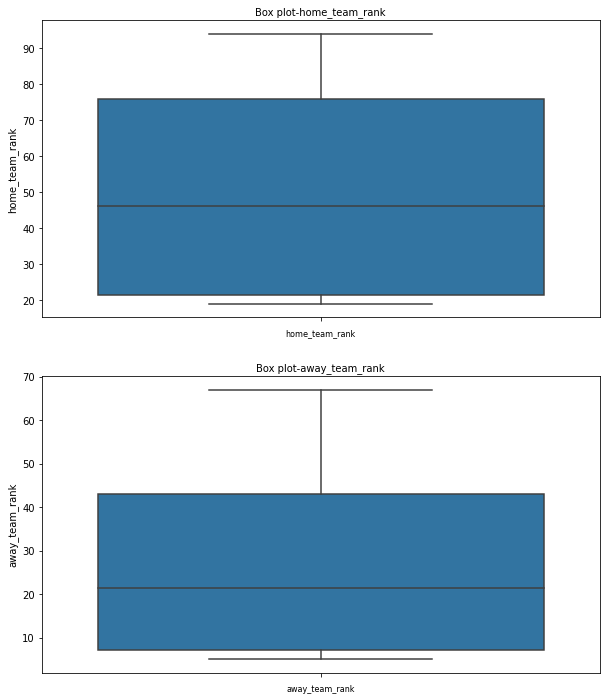

In [38]:
cols = ['home_team_rank', 'away_team_rank']


fig, ax = plt.subplots(len(cols), figsize = (10, 12))

for i, col_val in enumerate(cols):

  sns.boxplot(y= Football_df[col_val], ax=ax[i])
  ax[i].set_title('Box plot-{}'.format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [39]:
Football_df.describe()

,home_score,away_score,home_team_rank,away_team_rank,home_team_rank_change,away_team_rank_change,total_goals
count,18593.000000,18593.000000,4.000000,4.000000,4.000000,4.000000,18593.000000
mean,1.623192,1.074544,51.250000,28.750000,12.250000,7.750000,2.697736
std,1.660453,1.261707,36.854443,28.848743,15.456929,15.392098,1.917361
min,0.000000,0.000000,19.000000,5.000000,-6.000000,-5.000000,0.000000
25%,0.000000,0.000000,21.250000,7.250000,4.500000,-0.500000,1.000000
50%,1.000000,1.000000,46.000000,21.500000,12.000000,3.000000,2.000000
75%,2.000000,2.000000,76.000000,43.000000,19.750000,11.250000,4.000000
max,31.000000,21.000000,94.000000,67.000000,31.000000,30.000000,31.000000


In [40]:
columns = ['home_score', 'away_score', 'home_team_rank', 'away_team_rank']



for column in columns:
  print('The mean for the variables is: ''\n' )
  print(column +':' + str(Football_df[column].mean()))

The mean for the variables is: 

home_score:1.6231915236917118
The mean for the variables is: 

away_score:1.0745441832947884
The mean for the variables is: 

home_team_rank:51.25
The mean for the variables is: 

away_team_rank:28.75


In [41]:
for column in columns:
  print('The mode for the variable is:' '\n')
  print(column +':' + str(Football_df[column].mode()))

The mode for the variable is:

home_score:0    1
dtype: int64
The mode for the variable is:

away_score:0    0
dtype: int64
The mode for the variable is:

home_team_rank:0    19.0
1    22.0
2    70.0
3    94.0
dtype: float64
The mode for the variable is:

away_team_rank:0     5.0
1     8.0
2    35.0
3    67.0
dtype: float64


In [42]:
for column in columns:
  print('\n')
  print(column + ', variance: ' +str(Football_df[column].var()))
  print(column + ', std_deviation: ' +str(Football_df[column].std()))
  print(column + ', skewness: ' +str(Football_df[column].skew()))
  print(column + ', kurtosis: ' +str(Football_df[column].kurt()))



home_score, variance: 2.75710412085758
home_score, std_deviation: 1.660452986644783
home_score, skewness: 2.4017217291788455
home_score, kurtosis: 14.919673994229534


away_score, variance: 1.5919041395198699
away_score, std_deviation: 1.2617068358061114
away_score, skewness: 2.1776426806449716
away_score, kurtosis: 11.345880845989337


home_team_rank, variance: 1358.25
home_team_rank, std_deviation: 36.854443422740765
home_team_rank, skewness: 0.34830411743293793
home_team_rank, kurtosis: -3.9647750525120884


away_team_rank, variance: 832.25
away_team_rank, std_deviation: 28.848743473503312
away_team_rank, skewness: 0.9406224757894804
away_team_rank, kurtosis: -0.7679020876734235


Text(0.5, 1.0, 'Bar Chart of General Performance')

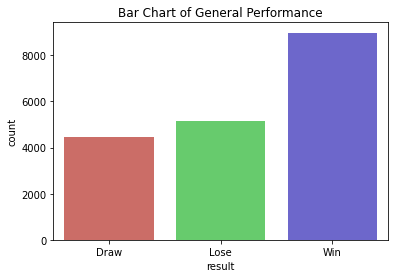

In [43]:
sns.countplot(x = 'result', data = Football_df, palette = 'hls')
plt.title('Bar Chart of General Performance')

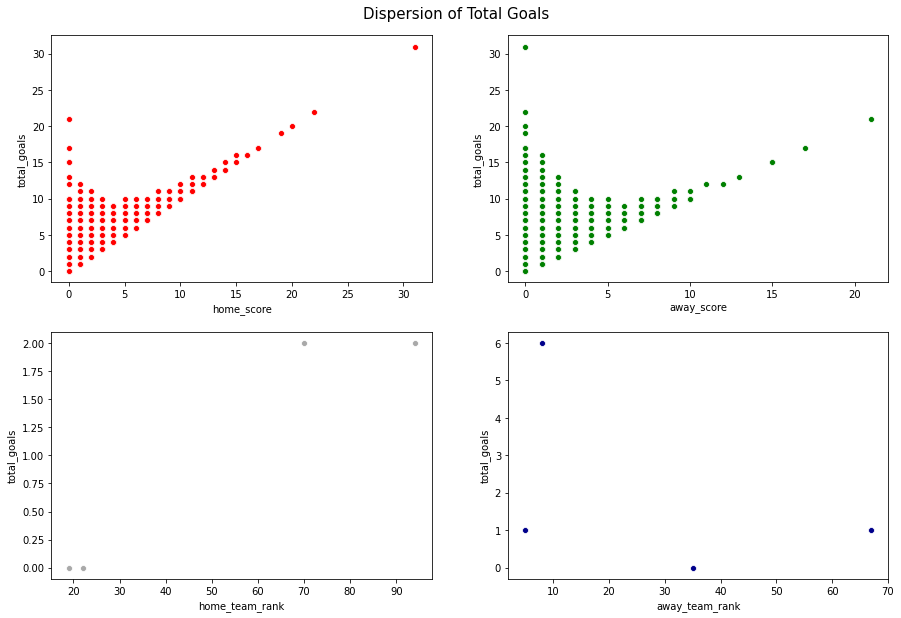

In [44]:
cols = ['home_score', 'away_score', 'home_team_rank', 'away_team_rank']
colors = ['red', 'green', 'darkgrey', 'darkblue']

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
plt.suptitle('Dispersion of Total Goals', fontsize = 15, y = 0.92)
for ax, data, column, color in zip(axes.flatten(), Football_df, cols, colors):
  sns.scatterplot(Football_df[column], Football_df.total_goals, ax = ax, color = color)

Text(0.5, 1.0, 'Bar Chart of Home Teams')

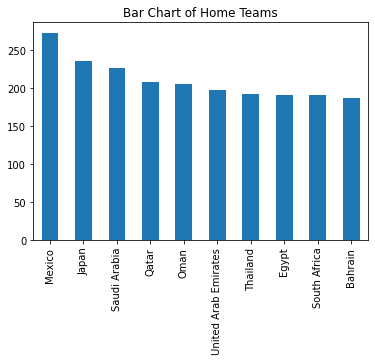

In [45]:
Cat_data = ['home_team', 'away_team', 'tournament', 'year']

Football_df['home_team'].value_counts().head(10).plot.bar()
plt.title('Bar Chart of Home Teams')

Text(0.5, 1.0, 'Bar Chart of Away Teams')

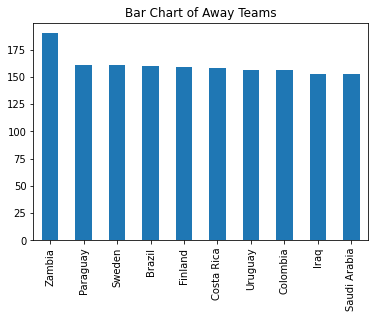

In [46]:
Football_df['away_team'].value_counts().head(10).plot.bar()
plt.title('Bar Chart of Away Teams')

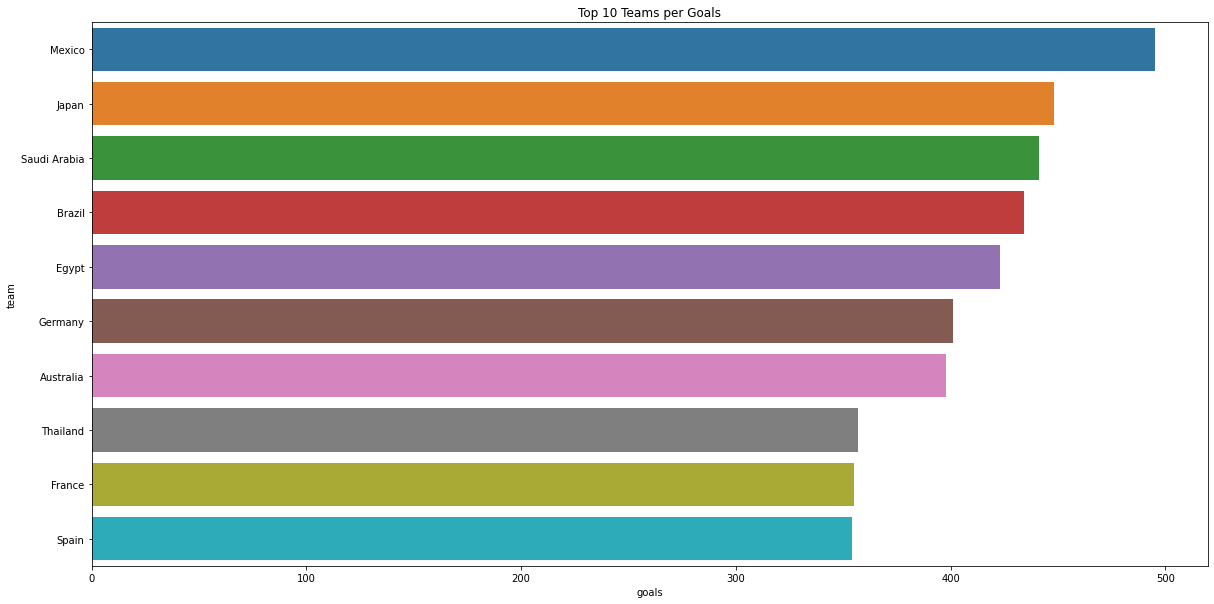

In [47]:
total_goals_home = Football_df.groupby('home_team')['home_score'].sum().reset_index()
total_goals_home.columns = ['team', 'goals'] 


total_goals_away = Football_df.groupby('away_team')['away_score'].sum().reset_index()
total_goals_away.columns = ['team', 'goals'] 


total_goals = pd.concat([total_goals_home, total_goals_away])
total_golas = total_goals.sort_values(by = 'goals', ascending = False, inplace = True) 


total_goals.goals = total_goals.goals.astype(int)

plt.figure(figsize=(20,10)) 
ax = sns.barplot("goals","team",data=total_goals[:10])

plt.title("Top 10 Teams per Goals")
plt.show()

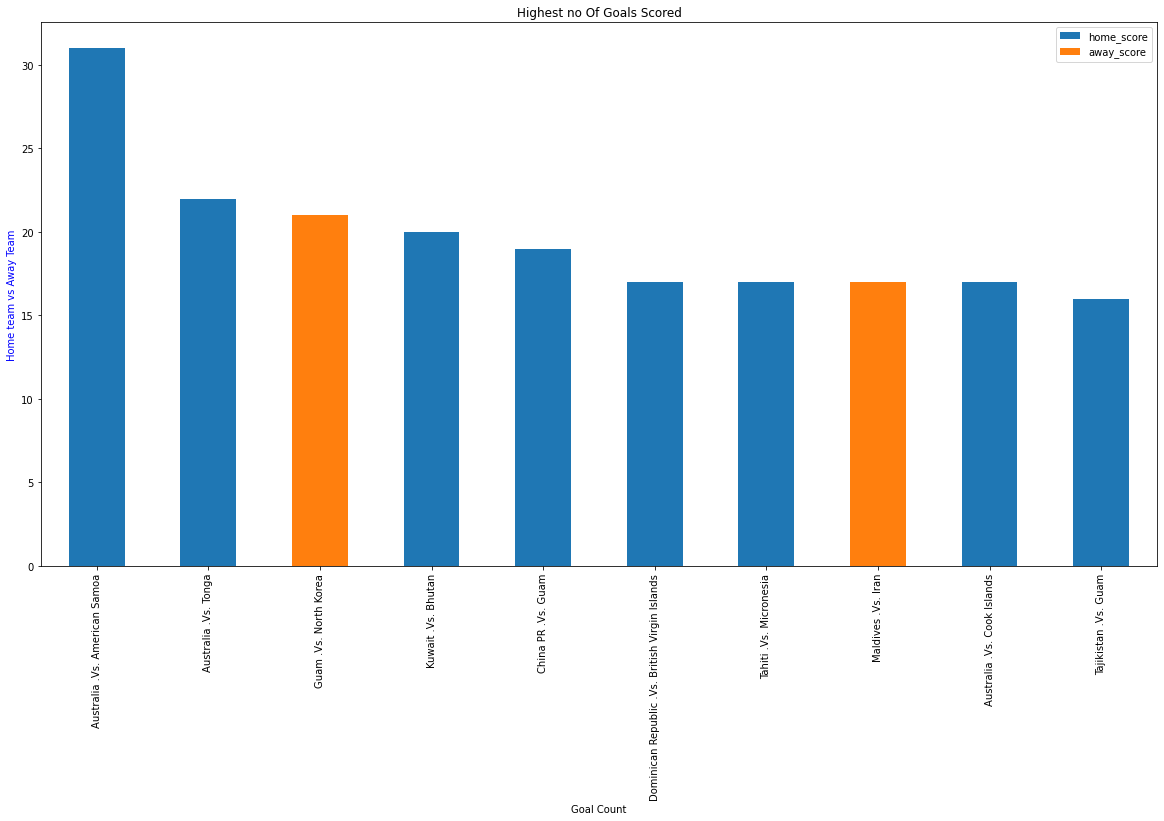

In [48]:
Highest_goals = Football_df.sort_values(by = 'total_goals', ascending = False)[:10][['date_x', 'home_team', 'away_team', 'home_score', 'away_score', 'total_goals']]


Highest_goals['match'] = Highest_goals[['home_team', 'away_team']].apply(lambda x: ' .Vs. '.join(x), axis = 1)
Highest_goals.index = Highest_goals.match

Highest_goals = Highest_goals.sort_values(by = 'total_goals', ascending = False) 


ax = Highest_goals[['home_score', 'away_score']].plot(kind="bar",stacked=True, figsize=(20,10),linewidth=2)


plt.ylabel("Home team vs Away Team",color="b") 
plt.xlabel("Goal Count")
plt.title("Highest no Of Goals Scored") 


plt.show()

In [49]:
Football_df['year'] = Ranking.date.dt.year
Football_df['month'] = Results.date.dt.month

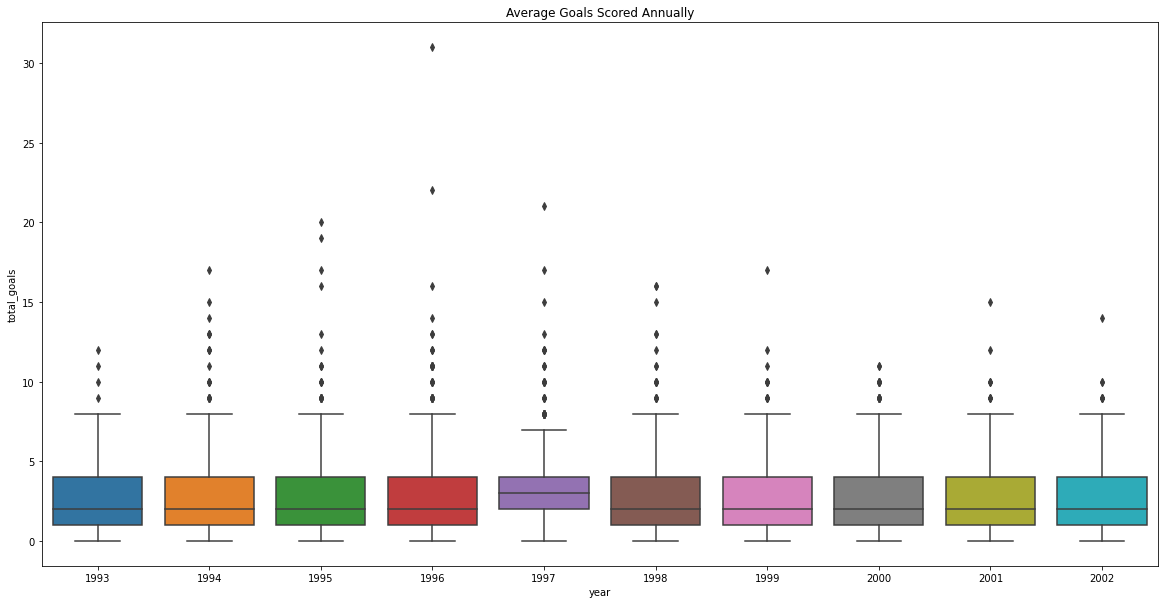

In [50]:
plt.figure(figsize=(20,10))  
ax = sns.boxplot(y=Football_df.total_goals,x=Football_df.year) 

plt.title("Average Goals Scored Annually")
plt.show()

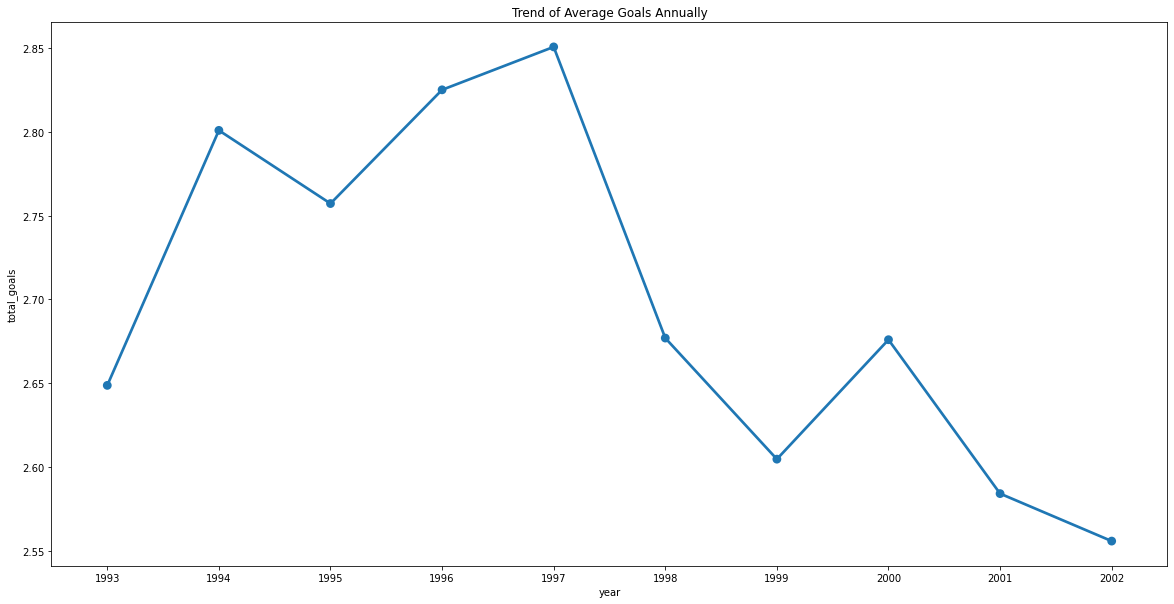

In [51]:
Goals = Football_df.groupby('year')['total_goals'].mean().reset_index()
Goals.year = Goals.year.astype(int) 

plt.figure(figsize=(20,10))
ax = sns.pointplot(Goals.year,Goals.total_goals) 
plt.title("Trend of Average Goals Annually") 
plt.show()

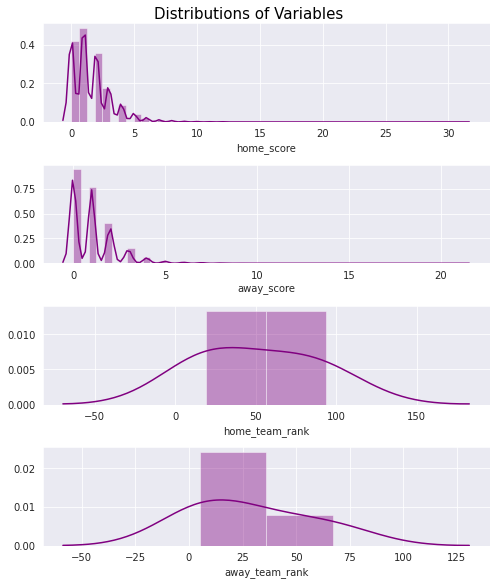

In [52]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(len(columns), figsize = (7, 8))
fig.suptitle('Distributions of Variables', y= 1.01, color = 'black', fontsize = 15)

for ax, data, name in zip(axes.flatten(), Football_df, columns):
  sns.distplot(Football_df[name], ax = ax, kde = True, color = 'purple')
plt.tight_layout()

Variance and standard deviation for both home and away scores are relatively low indicating that the datasets are relatively similar. However, the home and way ranking displays high levels of variance which indicates alrge outliers in those datasets.

Scores from both teams seem to have a normal distribution, with the home team score distribution being right skewed and with fat tails hence shows that there are outliers in this column. As for the away team's scores,the distriution is slightly skewed to the right and has thin tails. The ranks for both teams are normal with thin tails.

## 7. Implementing the Solution

This will take on two approaches which includes the polynomial and logistic regression approach

In [53]:
Football_df1 = Football_df.dropna()

## a) Polynomial Regression

In [54]:
Home_set = Football_df[['home_team',	'away_team',	'home_score',	'away_score',	'tournament', 'home_team_rank', 'away_team_rank']]


Home_set.head()

,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,NaN,NaN
1,Peru,Argentina,0,1,FIFA World Cup qualification,NaN,NaN
2,Uruguay,Ecuador,0,0,FIFA World Cup qualification,NaN,NaN
3,Venezuela,Brazil,1,5,FIFA World Cup qualification,NaN,NaN
4,Senegal,Zambia,0,0,FIFA World Cup qualification,NaN,NaN


In [55]:

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
FB = Football_df.apply(le.fit_transform)


FB.head(3)

,date_x,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,home_team_rank_change,away_team_rank_change,result,total_goals,year,month
0,0,41,161,0,0,27,4,4,4,4,0,0,0,10
1,0,138,8,0,1,27,12397,12397,12397,12397,1,1,0,2
2,0,184,63,0,0,27,12396,12396,12396,12396,0,0,0,2


In [56]:
FB.drop(columns= ['home_team_rank',	'away_team_rank',	'home_team_rank_change',	'away_team_rank_change'], axis=1, inplace=True)

In [57]:
#checking for correlation

Corr = FB.drop(columns = ['date_x', 'year',	'month', 'home_score', 'tournament',	'result',	'total_goals'], axis = 1).corr()
Corr


,home_team,away_team,away_score
home_team,1.000000,0.004394,-0.032005
away_team,0.004394,1.000000,0.016380
away_score,-0.032005,0.016380,1.000000


In [58]:
# computing VIF scores 

VIF = pd.DataFrame(np.linalg.inv(Corr.values), index = Corr.index, columns = Corr.columns)
VIF

,home_team,away_team,away_score
home_team,1.001050,-0.004925,0.032119
away_team,-0.004925,1.000293,-0.016543
away_score,0.032119,-0.016543,1.001299


The low correlation and VUF scores indicates a low level of correlation. 

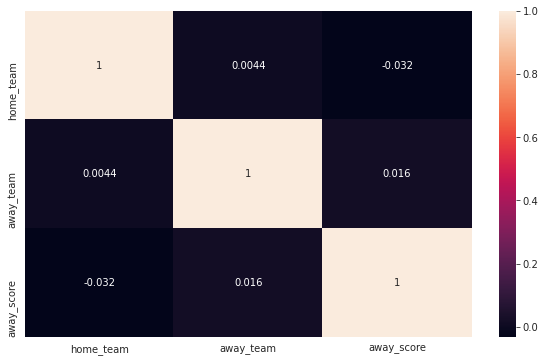

In [59]:
plt.figure(figsize = (10, 6))
sns.heatmap(Corr, annot = True)
plt.show()

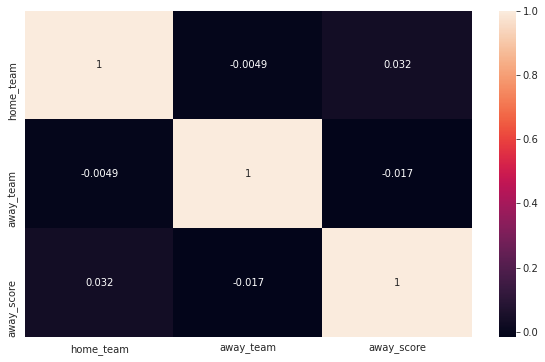

In [60]:
plt.figure(figsize = (10, 6))
sns.heatmap(VIF, annot = True)
plt.show()

In [66]:
Football_df["home_team_rank"] = Football_df["home_team_rank"].astype('category')
Football_df["away_team_rank"] = Football_df["away_team_rank"].astype('category')
Football_df["tournament"] = Football_df["tournament"].astype('category')
Football_df["result"] = Football_df["result"].astype('category')
Football_df["home_team_rank_change"] = Football_df["home_team_rank_change"].astype('category')
Football_df["away_team_rank_change"] = Football_df["away_team_rank_change"].astype('category')

In [67]:
Football_df["home_team_rank"] = Football_df["home_team_rank"].cat.codes
Football_df["away_team_rank"] = Football_df["away_team_rank"].cat.codes
Football_df["tournament"] = Football_df["tournament"].cat.codes
Football_df["result"] = Football_df["result"].cat.codes
Football_df["home_team_rank_change"] = Football_df["home_team_rank_change"].cat.codes
Football_df["away_team_rank_change"] = Football_df["away_team_rank_change"].cat.codes

In [68]:
Football_df.head()

,date_x,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,home_team_rank_change,away_team_rank_change,result,total_goals,year,month
0,1993-08-01,Colombia,Paraguay,0,0,27,0,0,0,0,0,0,1993,11
1,1993-08-01,Peru,Argentina,0,1,27,0,0,0,0,1,1,1993,3
2,1993-08-01,Uruguay,Ecuador,0,0,27,0,0,0,0,0,0,1993,3
3,1993-08-01,Venezuela,Brazil,1,5,27,0,0,0,0,1,6,1993,3
4,1993-08-07,Senegal,Zambia,0,0,27,0,0,0,0,0,0,1993,3


## Prediction of Home Team Goals

In [69]:
Home_set = Football_df[['home_score', 'tournament', 'home_team_rank', 'away_team_rank']]
Home_set.head(3)

,home_score,tournament,home_team_rank,away_team_rank
0,0,27,0,0
1,0,27,0,0
2,0,27,0,0


In [71]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [72]:
X = Home_set.drop("home_score", axis = 1)
y = Home_set["home_score"]
              
# split the dataset into train and test sets
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

# fit a polynomial regression model of degree 2
poly_reg = PolynomialFeatures(degree = 1)    

#fit and transform our x independent variables into a formart that has the polynomial feature
X_poly = poly_reg.fit_transform(X)   
# X_test_poly = poly_reg.fit_transform(X_test)

# apply our polynomial feature to linear regression
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)


# assess the accuracy of the model
y_pred = pol_reg.predict(poly_reg.fit_transform(X))

print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 1.2175450461988577
Mean Squared Error: 2.7565564404930885
Root Mean Squared Error: 1.6602880594924148


The root mean squared error is 1.660 which seems to be quite high hence our train and test sets are likely to be unevenly distributed. It is therefore important to cross-validate our model.

In [77]:
#calling train and test sets
X = Home_set[["tournament", "home_team_rank", "away_team_rank"]].values
y = Home_set["home_score"].values

# 
from sklearn.model_selection import KFold
folds = KFold(n_splits = 5)
# 
print('we are using ' + str (folds.get_n_splits(X))  +  ' folds')

# we create and assess 5 models based on the folds we created
RMSES = []
count = 1
for train_index, test_index in folds.split(X):
  print('\n Training model'  +  str(count))

  # set up train and test based on the split determined by kfold
  X_train1, X_test1 = X[train_index], X[test_index]
  y_train1, y_test1 = y[train_index], y[test_index]

  # fit a polynomial regression model of degree 1
  poly_reg_2 = PolynomialFeatures(degree = 1)     #fit a polynomial of degree 1
  X_poly_2 = poly_reg_2.fit_transform(X_train1)   #fit and transform our x independent variables into a formart that has the polynomial feature

  # apply our polynomial feature to linear regression
  pol_reg_2 = LinearRegression()
  pol_reg_2.fit(X_poly_2, y_train1)

  # assess the accuracy of the model
  y_pred1 = pol_reg_2.predict(poly_reg_2.fit_transform(X_test1))

  rmse_value = np.sqrt(metrics.mean_squared_error(y_test1, y_pred1))
  RMSES.append(rmse_value)

  print('Model' +  str(count) + 'Root Mean Squared Error:', rmse_value)
  count = count + 1

we are using 5 folds

 Training model1
Model1Root Mean Squared Error: 1.7343743125947764

 Training model2
Model2Root Mean Squared Error: 1.8547789118969766

 Training model3
Model3Root Mean Squared Error: 1.5995804984624062

 Training model4
Model4Root Mean Squared Error: 1.569363236447588

 Training model5
Model5Root Mean Squared Error: 1.5263088644844158


In [74]:
# compute the average value of all the RMSE scores above
np.mean(RMSES)

1.6568811647772326

From the above RMSE scores, we observe that model 2 had the highest RMSE while model 5 had the lowest. This indicates that most outliers could be found in this set which warrants further investigation. 

The mean value of the model above is equal to the mean value of the five models. However, models 3, 4 and 5 have RSMES below the mean value implying they are more reliable. 

In [78]:
# calling train and test sets
X = Home_set[["tournament", "home_team_rank", "away_team_rank"]].values
y = Home_set["home_score"].values

# importing leave one out library
from sklearn.model_selection import LeaveOneOut

#
folds = LeaveOneOut()

#find out how many folds set up for using  get_n_splits
print('we are using ' + str (folds.get_n_splits(X)) + ' folds')

# create and assess five models based on the folds we have created

RMSES = []
count = 0
for train_index, test_index in folds.split(X):
  # set up train and test based on split determined by kfold
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # fitting a polynomial regression model of degree 1

  poly_reg = PolynomialFeatures(degree = 1)     #fit a polynomial of degree 
  X_poly = poly_reg.fit_transform(X_train)      #fit and transform our independent train sets into a formart that has the polynomial feature

  #apply our polynomial feature to linear regression
  pol_reg = LinearRegression()                          
  pol_reg.fit(X_poly, y_train)

  # making predictions
  y_pred = pol_reg.predict(poly_reg.fit_transform(X_test))

  # import metrics
  from sklearn import metrics

  # assessing the accuracy of the model
  rmse_value = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append (rmse_value)

  count = count + 1

print('trained '+str(count) + ' models')
print('--------------------------')
print('The mean of the RMSES is: ' + str (np.mean(RMSES)))


we are using 18593 folds
trained 18593 models
--------------------------
The mean of the RMSES is: 1.2178767096407446


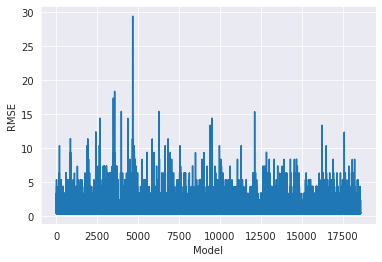

In [79]:
# plotting RMSE scores accross all our models
import matplotlib.pyplot as plt

plt.plot(RMSES)
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.show()

In [80]:
# importing leave one out library
from sklearn.model_selection import LeaveOneOut

#
folds = LeaveOneOut()

#find out how many folds set up for using  get_n_splits
print('we are using ' + str (folds.get_n_splits(X)) + ' folds')

# create and assess five models based on the folds we have created

RMSES = []
count = 0
for train_index, test_index in folds.split(X):
  # set up train and test based on split determined by kfold
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # fitting a polynomial regression model of degree 2

  poly_reg = PolynomialFeatures(degree = 2)     #fit a polynomial of degree 2
  X_poly = poly_reg.fit_transform(X_train)      #fit and transform our independent train sets into a formart that has the polynomial feature

  #apply our polynomial feature to linear regression
  pol_reg = LinearRegression()                          
  pol_reg.fit(X_poly, y_train)

  # making predictions
  y_pred = pol_reg.predict(poly_reg.fit_transform(X_test))

  # import metrics
  from sklearn import metrics

  # assessing the accuracy of the model
  rmse_value = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append (rmse_value)

  count = count + 1

print('trained '+str(count) + ' models')
print('--------------------------')
print('The mean of the RMSES is: ' + str (np.mean(RMSES)))

we are using 18593 folds
trained 18593 models
--------------------------
The mean of the RMSES is: 1.229035356835337


The mean value of the RMSES  1.2178, which significantly lower than the models from the above 5 folds. This is the best score which is going to be difficult to beat. Hence for predicting the home scores for the home teams this model is the best fit.
Increasing the polynomial degree, slightly increases the RMSE to 1.2178 value which indicates that any degree higher than 1 would lead to issues like overfitting. 

In [81]:
#Checking for residuals

residuals = np.subtract(y_pred, y_test)


pd.DataFrame(residuals).describe()
residuals.mean()

-0.39284085130501034

In [86]:
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# Calculating the critical value of the chi squared distribution, to compare it with the test_result

degrees_of_freedom = len(y_pred) - 1
probability =  1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degrees_of_freedom)

# If the test_result is greater than the critical value, then the null hypothesis is rejected. 
# This means that there are patterns to the variance of the data which is heterogenous.

# If there no patterns identified, the null hypothesis is accepted. 
# This means that the variance is homogeneous 

if (test_result > critical_value):
  print('The test result of',{np.round(test_result,2)}, 'is greater than the critical value')
  print('Thefore the variances are unequal, which means that the model should be reassessed')
  print('The variances are heterogenous')
else:
  print('The test result of',{np.round(test_result,2)},'is less than the critical value')
  print('Thefore the variances are equal, which means that the model is good and does not require reassesment.')
  print('The variances are homogeneous')

The test result of {nan} is less than the critical value
Thefore the variances are equal, which means that the model is good and does not require reassesment.
The variances are homogeneous


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2242: RuntimeWarning: divide by zero encountered in true_divide
  denom = 1.0 + 1.0/(3*(k - 1)) * ((np.sum(1.0/(Ni - 1.0), axis=0)) -
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2243: RuntimeWarning: divide by zero encountered in double_scalars
  1.0/(Ntot - k))
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2243: RuntimeWarning: invalid value encountered in double_scalars
  1.0/(Ntot - k))


The test result of {nan} is less than the critical value
Thefore the variances are equal, which means that the model is good and does not require reassesment.
The variances are homogeneous

## Prediction of Away Team Goals

In [87]:
Away_set = Football_df[["away_score", "tournament", "home_team_rank", "away_team_rank"]]
Away_set.head(3)

,away_score,tournament,home_team_rank,away_team_rank
0,0,27,0,0
1,1,27,0,0
2,0,27,0,0


In [88]:
A = Away_set.drop("away_score", axis = 1)
b = Away_set["away_score"]

In [89]:
# fitting a polynomial regression model of degree 1

poly_reg = PolynomialFeatures(degree = 1)     #fit a polynomial of degree 1
A_poly = poly_reg.fit_transform(A)             #fit and transform our independent train sets into a formart that has the polynomial feature

#apply our polynomial feature to linear regression
pol_reg = LinearRegression()                          
pol_reg.fit(A_poly, b)

# making predictions
b_pred = pol_reg.predict(poly_reg.fit_transform(A))

# assessing the model
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(b, b_pred)))

Root Mean Squared Error: 1.2613229582719565


In [92]:
# importing leave one out library
from sklearn.model_selection import LeaveOneOut

A = Away_set[["tournament", "home_team_rank", "away_team_rank"]].values
b = Away_set["away_score"].values

#
folds = LeaveOneOut()

#find out how many folds set up for using  get_n_splits
print('we are using ' + str (folds.get_n_splits(X)) + ' folds')

# create and assess five models based on the folds we have created

RMSES = []
count = 0
for train_index, test_index in folds.split(X):
  # set up train and test based on split determined by kfold
  A_train, A_test = A[train_index], A[test_index]
  b_train, b_test = b[train_index], b[test_index]

  # fitting a polynomial regression model of degree 2

  poly_reg = PolynomialFeatures(degree = 2)     #fit a polynomial of degree 2
  A_poly = poly_reg.fit_transform(A_train)      #fit and transform our independent train sets into a formart that has the polynomial feature

  #apply our polynomial feature to linear regression
  pol_reg = LinearRegression()                          
  pol_reg.fit(A_poly, b_train)

  # making predictions
  b_pred = pol_reg.predict(poly_reg.fit_transform(A_test))

  # import metrics
  from sklearn import metrics

  # assessing the accuracy of the model
  rmse_value = np.sqrt(metrics.mean_squared_error(b_test, b_pred))
  RMSES.append (rmse_value)

  count = count + 1
  
print('trained '+str(count) + ' models')
print('--------------------------')
print('The mean of the RMSES is: ' + str (np.mean(RMSES)))


we are using 18593 folds
trained 18593 models
--------------------------
The mean of the RMSES is: 0.9020697769166346


The root mean squared error is 1.261 which seems to be quite high hence our train and test sets are likely to be unevenly distributed. It is therefore important to cross-validate our model.
After cross validation the RMSE score has reduced making difficult to fit a polynomial model with a lower RMSES hence the cross validated model is a better model.

In [93]:
#Checking residuals
residuals = np.subtract(b_pred, b_test)


pd.DataFrame(residuals).describe()
residuals.mean()

0.06940210711896166

In [94]:
# checking for heteroscedasticity

test_result, p_value = sp.stats.bartlett(b_pred, residuals)

# Calculating the critical value of the chi squared distribution, to compare it with the test_result

degrees_of_freedom = len(y_pred) - 1
probability =  1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degrees_of_freedom)

# If the test_result is greater than the critical value, then the null hypothesis is rejected. 
# This means that there are patterns to the variance of the data which is heterogenous.

# If there no patterns identified, the null hypothesis is accepted. 
# This means that the variance is homogeneous 

if (test_result > critical_value):
  print('The test result of',{np.round(test_result,2)}, 'is greater than the critical value')
  print('Thefore the variances are unequal, which means that the model should be reassessed')
  print('The variances are heterogenous')
else:
  print('The test result of',{np.round(test_result,2)},'is less than the critical value')
  print('Thefore the variances are equal, which means that the model is good and does not require reassesment.')
  print('The variances are homogeneous')

The test result of {nan} is less than the critical value
Thefore the variances are equal, which means that the model is good and does not require reassesment.
The variances are homogeneous


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2242: RuntimeWarning: divide by zero encountered in true_divide
  denom = 1.0 + 1.0/(3*(k - 1)) * ((np.sum(1.0/(Ni - 1.0), axis=0)) -
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2243: RuntimeWarning: divide by zero encountered in double_scalars
  1.0/(Ntot - k))
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2243: RuntimeWarning: invalid value encountered in double_scalars
  1.0/(Ntot - k))


## b) Logistic Regression Approach

In [96]:
Reg_df = Football_df[['home_team', 'away_team', 'home_score', 'away_score', 'tournament', 'year', 'home_team_rank', 'away_team_rank', 'result']]


Reg_df.head()

,home_team,away_team,home_score,away_score,tournament,year,home_team_rank,away_team_rank,result
0,Colombia,Paraguay,0,0,27,1993,0,0,0
1,Peru,Argentina,0,1,27,1993,0,0,1
2,Uruguay,Ecuador,0,0,27,1993,0,0,0
3,Venezuela,Brazil,1,5,27,1993,0,0,1
4,Senegal,Zambia,0,0,27,1993,0,0,0


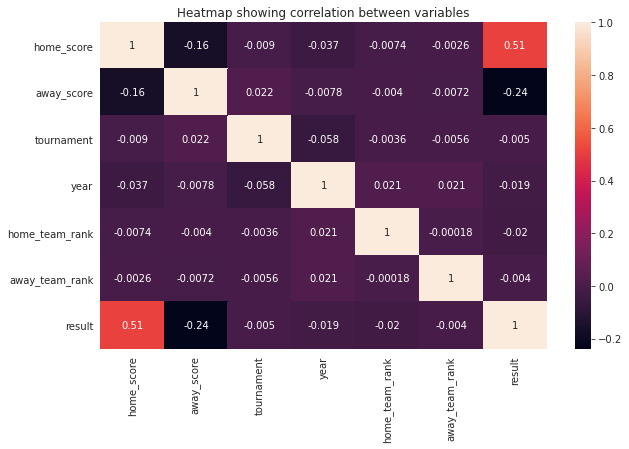

In [98]:
plt.figure(figsize = (10, 6))
sns.heatmap(Reg_df.corr(), annot = True) 
plt.title('Heatmap showing correlation between variables')
plt.show()

In [99]:
# Spliting the data into features and the target variable

X = Reg_df.drop('result', axis = 1)
y = Reg_df.result

# Encoding the categorical features

X = pd.get_dummies(X, drop_first=True)

# Spliting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# Instantiating the model and training the model

logistic = LogisticRegression()
logistic.fit(X_train, y_train)

# Making predictions

y_pred = logistic.predict(X_test)

# Measuring the accuracy of the model

print('The accuracy of the model is',{accuracy_score(y_test, y_pred)})
print('The f1 score of the model is',{f1_score(y_test, y_pred, average = "macro")})
confusion_matrix(y_test, y_pred)

The accuracy of the model is {1.0}
The f1 score of the model is {1.0}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[1089,    0,    0],
       [   0, 1288,    0],
       [   0,    0, 2272]])

The model is 100% accurate with a very high f score which indicates that it is overfitted.

In [100]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
params = {'C': [1.0, 5.0],
         'penalty': ['l1', 'l2']}

logistic = LogisticRegression()

In [102]:
kfold = KFold(n_splits = 10)


grid_search = GridSearchCV(estimator=logistic, param_grid = params, cv = kfold, scoring = 'accuracy')

In [103]:
grid_search_results = grid_search.fit(X, y)


print('Best score is',{grid_search.best_score_})
print('The best parameters are',grid_search.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITER

Best score is {0.9999462365591398}
The best parameters are {'C': 1.0, 'penalty': 'l2'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The analysis reveals the following:

Best score is {0.9999462365591398}
The best parameters are {'C': 1.0, 'penalty': 'l2'}

## 8. Challenging the solution

> The polynomial model predicting the home team's scores has a higher RMSE score that the polynomial model predicting the away team's score. The latter is hence a better model. However, the scores were not the best indicating underlying issues with the dataset. We lost a considerable amount of data in the cleaning and merging whuch may have explained the result. 






## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

Yes, we had the right data for the analysis which yieled satisfactory results. 

### b). Do we need other data to answer our question?
We would need player information for better predictions. 

### c). Did we have the right question?
Yes we had the right questions. 